In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Initialization

<img src = 'initial.png'>

In [3]:
from keras.layers import Dense, Flatten
from keras.models import Sequentialquential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

<p class = 'note'>By default, keras uses <b>Glorot</b> initialization</p>
<code>kernel_initializer = 'he_uniform'</code>, 
<code>kernel_intializer = 'he_normal'></code>

In [4]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 16)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
model1 = Sequential([
    Dense(30, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(10, activation = 'softmax')
])
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
hist1 = model1.fit(X_train, y_train, validation_data = [X_valid, y_valid], epochs = 20)

Train on 1010 samples, validate on 337 samples
Epoch 1/20
1010/1010 [==============================] - 1s 877us/step - loss: 2.3074 - accuracy: 0.2040 - val_loss: 2.0282 - val_accuracy: 0.3264
Epoch 2/20
1010/1010 [==============================] - 0s 105us/step - loss: 1.6688 - accuracy: 0.4545 - val_loss: 1.5313 - val_accuracy: 0.5519
Epoch 3/20
1010/1010 [==============================] - 0s 88us/step - loss: 1.2485 - accuracy: 0.6604 - val_loss: 1.1859 - val_accuracy: 0.6914
Epoch 4/20
1010/1010 [==============================] - 0s 91us/step - loss: 0.9550 - accuracy: 0.7782 - val_loss: 0.9254 - val_accuracy: 0.7626
Epoch 5/20
1010/1010 [==============================] - 0s 104us/step - loss: 0.7455 - accuracy: 0.8317 - val_loss: 0.7477 - val_accuracy: 0.7982
Epoch 6/20
1010/1010 [==============================] - 0s 102us/step - loss: 0.5933 - accuracy: 0.8673 - val_loss: 0.6197 - val_accuracy: 0.8457
Epoch 7/20
1010/1010 [==============================] - 0s 88us/step - loss: 0.

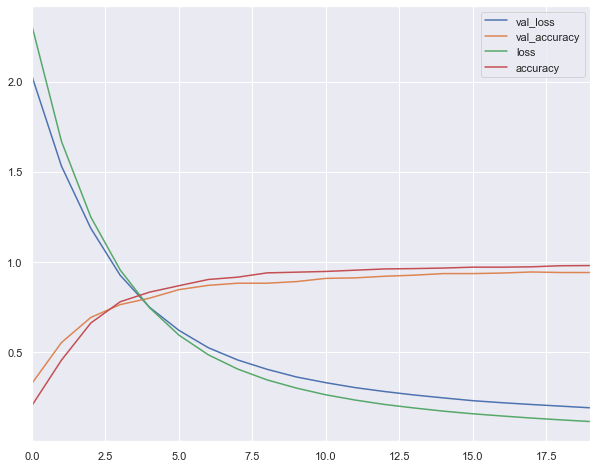

In [8]:
df = pd.DataFrame(hist1.history)
df.plot(figsize = (10, 8))

If you want He initialization with a uniform distribution, but based on $fan_{avg}$ rather
than $fan_{in}$, you can use the <code>VarianceScaling</code> initializer like this:

In [11]:
from keras.initializers import VarianceScaling
init = VarianceScaling(scale = 2, mode = 'fan_avg', distribution='uniform')
hidden1 = Dense(30,  activation = 'relu', kernel_initializer=init)

# Non-saturated Activation Functions

<p class = 'highlight'>
So which activation function should you use for the hidden layers
of your deep neural networks? Although your mileage will vary, in
general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh
> logistic. If the network’s architecture prevents it from selfnormalizing, then ELU may perform better than SELU (since SELU
is not smooth at z = 0). If you care a lot about runtime latency, then
you may prefer leaky ReLU. If you don’t want to tweak yet another
hyperparameter, you may just use the default α values used by
Keras (e.g., 0.3 for the leaky ReLU). If you have spare time and
computing power, you can use cross-validation to evaluate other
activation functions, in particular RReLU if your network is over‐
fitting, or PReLU if you have a huge training set.
<p>

## Leaky ReLU

In [14]:
from keras.layers import LeakyReLU
LReLU = LeakyReLU(alpha = .01)
hidden = Dense(30, activation=LReLU, kernel_initializer='he_normal')

## Scale Exponential Linear Unit (SELU)

In [15]:
hidden = Dense(30, activation = 'selu', kernel_initializer='lecun_normal')

# Batch Normalization

In [18]:
from keras.layers import BatchNormalization
model2 = Sequential([
    BatchNormalization(),
    Dense(30, activation = 'elu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dense(8, activation = 'elu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dense(10, activation = 'softmax')
])
model2.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [19]:
early_cb = EarlyStopping(patience=10, restore_best_weights=True)
model2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 30, callbacks = [early_cb])

Train on 1010 samples, validate on 337 samples
Epoch 1/30
1010/1010 [==============================] - 2s 2ms/step - loss: 2.1545 - accuracy: 0.2505 - val_loss: 1.8390 - val_accuracy: 0.4036
Epoch 2/30
1010/1010 [==============================] - 0s 140us/step - loss: 1.6070 - accuracy: 0.5139 - val_loss: 1.4634 - val_accuracy: 0.5519
Epoch 3/30
1010/1010 [==============================] - 0s 135us/step - loss: 1.3473 - accuracy: 0.6465 - val_loss: 1.2626 - val_accuracy: 0.6439
Epoch 4/30
1010/1010 [==============================] - 0s 134us/step - loss: 1.1895 - accuracy: 0.7099 - val_loss: 1.1229 - val_accuracy: 0.6914
Epoch 5/30
1010/1010 [==============================] - 0s 141us/step - loss: 1.0618 - accuracy: 0.7535 - val_loss: 1.0108 - val_accuracy: 0.7507
Epoch 6/30
1010/1010 [==============================] - 0s 137us/step - loss: 0.9571 - accuracy: 0.7871 - val_loss: 0.9108 - val_accuracy: 0.8042
Epoch 7/30
1010/1010 [==============================] - 0s 139us/step - loss: 0

In [22]:
pd.Series(model2.evaluate(X_test, y_test), index = ['loss', 'accuracy'])

450/450 [==============================] - 0s 34us/step


loss        0.311988
accuracy    0.953333
dtype: float64

The authors of the BN paper argued in favor of adding the BN layers before the acti‐
vation functions, rather than after (as we just did). There is some debate about this, as
it seems to depend on the task. So that’s one more thing you can experiment with to
see which option works best on your dataset. To add the BN layers before the activa‐
tion functions, we must remove the activation function from the hidden layers, and
add them as separate layers after the BN layers. Moreover, since a Batch Normaliza‐
tion layer includes one offset parameter per input, you can remove the bias term from
the previous layer (just pass <code>use_bias=False</code> when creating it):

In [27]:
from keras.layers import Activation
model3 = Sequential([
    BatchNormalization(),
    Dense(30, kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Activation('elu'),
    Dense(10, activation = 'softmax')
])

model3.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
hist3 = model3.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 30, callbacks = [EarlyStopping(patience = 8, restore_best_weights=True)])

Train on 1010 samples, validate on 337 samples
Epoch 1/30
1010/1010 [==============================] - 1s 832us/step - loss: 2.4499 - accuracy: 0.1455 - val_loss: 2.0096 - val_accuracy: 0.3620
Epoch 2/30
1010/1010 [==============================] - 0s 122us/step - loss: 1.6315 - accuracy: 0.4634 - val_loss: 1.3915 - val_accuracy: 0.6113
Epoch 3/30
1010/1010 [==============================] - 0s 112us/step - loss: 1.2049 - accuracy: 0.6564 - val_loss: 1.0629 - val_accuracy: 0.7062
Epoch 4/30
1010/1010 [==============================] - 0s 114us/step - loss: 0.9549 - accuracy: 0.7634 - val_loss: 0.8676 - val_accuracy: 0.7626
Epoch 5/30
1010/1010 [==============================] - 0s 116us/step - loss: 0.7799 - accuracy: 0.8158 - val_loss: 0.7346 - val_accuracy: 0.7953
Epoch 6/30
1010/1010 [==============================] - 0s 117us/step - loss: 0.6562 - accuracy: 0.8495 - val_loss: 0.6338 - val_accuracy: 0.8309
Epoch 7/30
1010/1010 [==============================] - 0s 113us/step - loss:

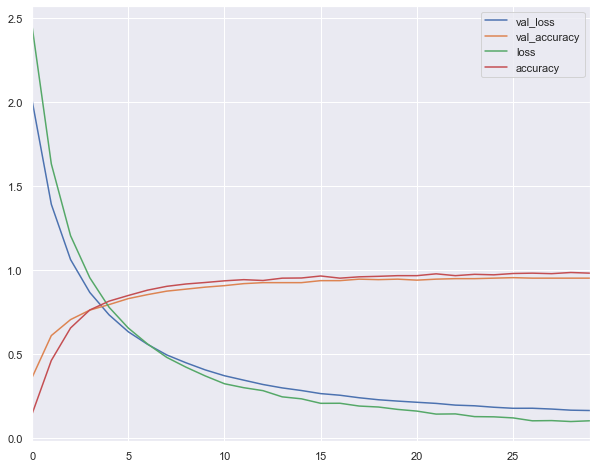

In [29]:
pd.DataFrame(hist3.history).plot(figsize = (10, 8))

In [30]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1950      
_________________________________________________________________
batch_normalization_14 (Batc (None, 30)                120       
_________________________________________________________________
activation_3 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                310       
Total params: 2,636
Trainable params: 2,448
Non-trainable params: 188
_________________________________________________________________


In [33]:
model3.layers

## Tuning hyperparameters of Batch Normalization

The <code>BatchNormalization</code> class has quite a few hyperparameters you can tweak. The
defaults will usually be fine, but you may occasionally need to tweak the <b>momentum</b>.

In [45]:
batch_layer = BatchNormalization(momentum = .9)


Tuning <code>axis</code> keyword

# Gradient Clipping

setting <code>clipvalue</code> or <code>clipnorm</code> in <b>Gradient optimizer</b>

In [47]:
from keras.optimizers import SGD
opt = SGD(clipvalue = 2.)

<b>Explain</b>:
    If partitial derivative is large than 2 then we clip it to 2<br>
    If partitial derivative is smaller than -2 than we clip it to -2

<code>clipnorm</code>: Normalize the gradient vector to unit length then clip <br>


# Reusing Pretrained Layers

## Transfer Learning

<img src = 'transfer.png'>

<img src = 'transfer_tip.png'>

## Transfer learning with Keras

# Unsupervised with Pretraining

<img src = 'pretrain.png'>